## Friedman Problem

In [1]:
import numpy as np
from itertools import combinations, product, combinations_with_replacement
from sklearn.datasets import make_friedman1
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from matplotlib import pyplot as plt
import itertools
from sklearn.inspection import partial_dependence
import matplotlib.pyplot as plt
from sklearn_gbmi import *
from utilities import *

<frozen importlib._bootstrap>:228: RuntimeWarning: sklearn.tree._splitter.Splitter size changed, may indicate binary incompatibility. Expected 360 from C header, got 1160 from PyObject


In [2]:
from sklearn.datasets import make_friedman1
# generate data set
X_f, y_f = make_friedman1(n_samples = 500, noise=1, random_state=34)

# normolize data set
min_max_scaler = preprocessing.MinMaxScaler()
X_f_minmax = min_max_scaler.fit_transform(X_f)

# define model and train
lr_f = RandomForestRegressor(random_state=2023, max_depth=10)
lr_f.fit(X_f_minmax, y_f)
lr_f.score(X_f_minmax, y_f)

9.700026212598045e-01

In [3]:
loss0, bound_f, bound_f_half = find_boundary(y_f, lr_f.predict(X_f_minmax))
loss0, bound_f, bound_f_half

(0.7539061985951908, 0.03769530992975954, 0.01884765496487977)

In [4]:
vt_f, points_all_max, points_all_min =find_VT(bound_f, loss0, range(len(X_f_minmax[-1])), lr_f, X_f_minmax, y_f)

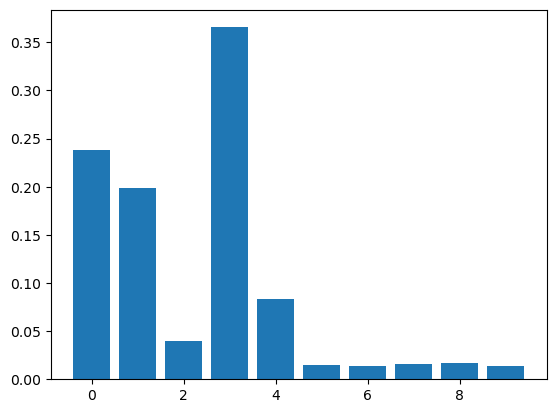

In [5]:
plt.bar(range(10), lr_f.feature_importances_)
# plt.xticks(range(len(model.feature_importances_)), train_features.columns)
plt.show()


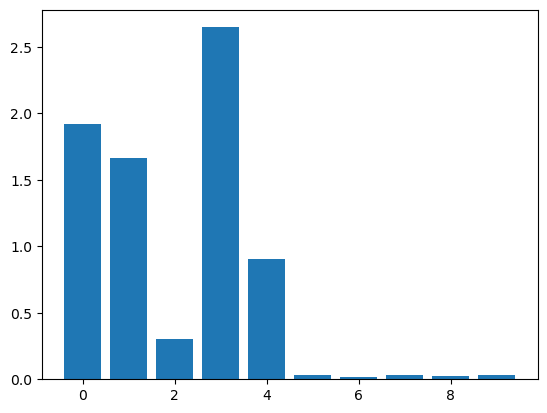

In [6]:
from sklearn.inspection import partial_dependence
# PD feature importance by Brandon
VI_pd = []
for vname in range(len(X_f_minmax[-1])):
    VI_pd.append(np.std(partial_dependence(lr_f, features=[vname], X=X_f_minmax)['average'][0]))
plt.bar( range(len(VI_pd)), VI_pd)
# plt.xticks(range(len(model.feature_importances_)), train_features.columns)
plt.show()

In [515]:
s1 = np.sqrt(np.sum(np.sum(np.square(vt_f-1),axis=1), axis=1)/20)
s2 = (np.mean(1/abs(vt_f[:,:,0]-1), axis=1)+np.mean(1/abs(vt_f[:,:,1]-1), axis=1))/2

In [503]:
vt_regression = []
for i in range(10):
    vt_regression.append(np.polyfit(vt_f[i,:,0], vt_f[i,:,1], 2)[0])

[77.47370035141539,
 -68.46755180524713,
 -3.673982762979574,
 -111.86980888574293,
 -17.192808542064668,
 -4.411945917842322,
 1.9774410770424389,
 3.0012605747415813,
 0.7136043853525547,
 2.6175131379442504]

In [7]:
vt_d1 = np.sum(vt_f[:,1:,:] - vt_f[:,:-1,:], axis=1)

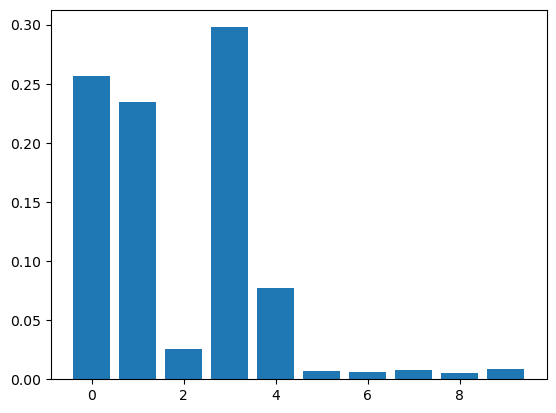

In [88]:
import matplotlib.pyplot as plt
plt.bar(range(10), np.sum(np.std(vt_fi, axis=1), axis=1))
# plt.xticks(range(len(model.feature_importances_)), train_features.columns)
plt.show()


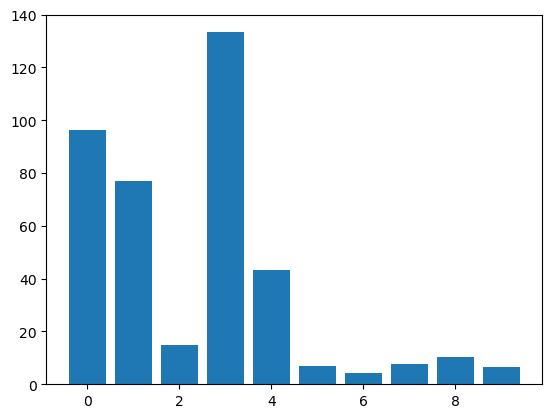

In [8]:
import matplotlib.pyplot as plt
plt.bar(range(10), 1/(vt_d1[:,0]+abs(vt_d1[:,1])))
# plt.xticks(range(len(model.feature_importances_)), train_features.columns)
plt.show()

In [9]:
def MDS(vt_l, n_features_in, n_features_out=2):
    '''
    transform from 10x10x2x10 to 10x10x2x1
    '''
    vt_l_transformed_x = np.zeros((len(vt_l), len(vt_l[-1]), n_features_out))
    vt_l_transformed_y = np.zeros((len(vt_l), len(vt_l[-1]), n_features_out))
    d_old = vt_l-1
    vt_l_x = d_old[:,:,0]
    vt_l_y = d_old[:,:,1]
    # distance is (x_+, 1) (x_-, 1) to (1, 1)
    degree_avg = np.pi/10
    for i in range(n_features_in):
        vt_l_transformed_x[i,:,0] = vt_l_x[i,:]*np.cos(i*degree_avg)
        vt_l_transformed_x[i,:,1] = vt_l_x[i,:]*np.sin(i*degree_avg)
        vt_l_transformed_y[i,:,0] = vt_l_y[i,:]*np.cos(i*(degree_avg))
        vt_l_transformed_y[i,:,1] = vt_l_y[i,:]*np.sin(i*(degree_avg))
    return vt_l_transformed_x, vt_l_transformed_y

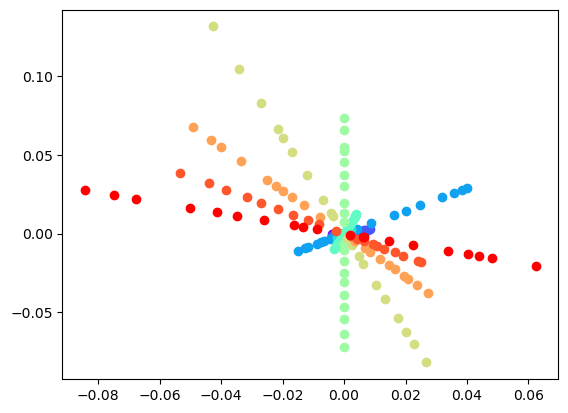

In [10]:
import matplotlib.cm as cm


vt_l_transformed_x, vt_l_transformed_y = MDS(vt_f, 10, n_features_out=2)
colors = cm.rainbow(np.linspace(0, 1, 10))

for i in range(10):
    plt.scatter(vt_l_transformed_x[i, :,0], vt_l_transformed_x[i, :,1], color=colors[i])
    plt.scatter(vt_l_transformed_y[i,:,0], vt_l_transformed_y[i, :,1], color=colors[i])
    

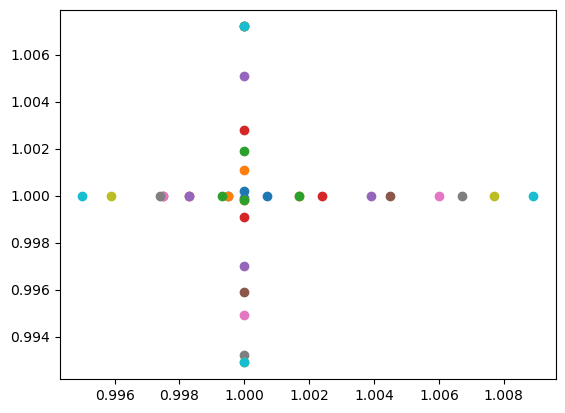

In [11]:
# visulize two features feature 1 feature 2
for i in range(10):
    xx_x1 = np.column_stack((np.ones(10), vt_f[[0], :][0][:,0]))
    xx_y1 = np.column_stack((np.ones(10), vt_f[[0], :][0][:,1]))
    xx_x2 = np.column_stack((np.ones(10), vt_f[[1], :][0][:,0]))
    xx_y2 = np.column_stack((np.ones(10), vt_f[[1], :][0][:,1]))
    xy = np.array([xx_x1[i], xx_y1[i], np.flip(xx_x2[i]), np.flip(xx_y2[i])])
    plt.scatter(xy[:,0], xy[:,1])

In [31]:
points_all_min

[[[[0.9999, 0.0002743658945609795],
   [0.9998, 0.0008636211902588453],
   [0.9997, 0.002565988869275726],
   [0.9996, 0.002079011319022772],
   [0.9995, 0.0032201546401480208],
   [0.9994000000000001, 0.0031801165880580573],
   [0.9993000000000001, 0.0030111385952058534],
   [0.9992000000000001, 0.003090045572490374]],
  [[0.999, 0.004372279500619358],
   [0.9989, 0.0041140457964292665],
   [0.9988, 0.006935779963158417],
   [0.9987, 0.00711465929043853]],
  [[0.999, 0.004372279500619358],
   [0.9989, 0.0041140457964292665],
   [0.9988, 0.006935779963158417],
   [0.9987, 0.00711465929043853],
   [0.9986, 0.011252747849000988]],
  [[0.999, 0.004372279500619358],
   [0.9989, 0.0041140457964292665],
   [0.9988, 0.006935779963158417],
   [0.9987, 0.00711465929043853],
   [0.9986, 0.011252747849000988],
   [0.9985, 0.013589352989697656],
   [0.9984000000000001, 0.013558333328277494],
   [0.9983000000000001, 0.013812976634541507],
   [0.9982000000000001, 0.013467024831073982],
   [0.9981000

/tmp/ipykernel_3935440/2909836143.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  points_all = [np.array(points_all_max)[:,-1][i]+np.array(points_all_min)[:,-1][i] for i, idx in enumerate(range(len(points_all_min))[::-1])]


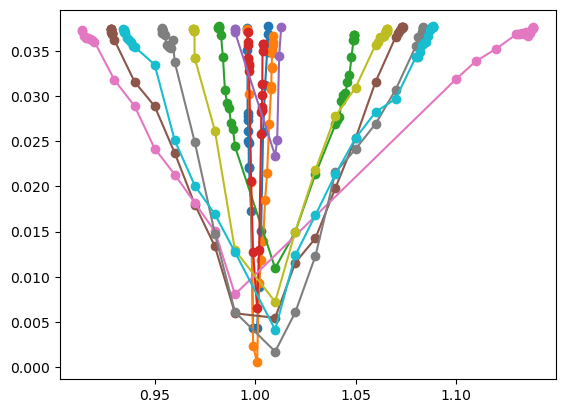

In [51]:
points_all = [np.array(points_all_max)[:,-1][i]+np.array(points_all_min)[:,-1][i] for i, idx in enumerate(range(len(points_all_min))[::-1])]

for i in points_all:
    i=np.array(i)
    xx, xy = zip(*sorted(zip(i[:,0],i[:,1])))
    plt.plot(xx, xy, marker='o')


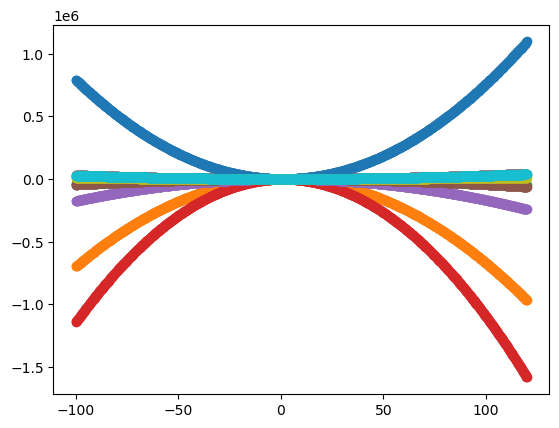

In [524]:
vt_regression = []
for i in range(10):
    x2 = np.polyfit(vt_f[i,:,0], vt_f[i,:,1], 2)
    x = np.linspace(-100,120,1000)
    y = x2[0]*(x**2)+x2[1]*x+x2[2]
    
    plt.plot(x, y, marker='o')
    vt_regression.append(np.polyfit(vt_f[i,:,0], vt_f[i,:,1], 2)[0])

In [85]:
def loss_shuffle(values, v_idx, y_true, times=10):
    loss_all = []
    for i in range(times):
        np.random.shuffle(values[:,v_idx])
        pred = lr_f.predict(values)
        loss = mean_squared_error(y_true, pred)
        loss_all.append(loss)
    return np.mean(loss_all)

vt_fi = vt_f.copy()
for idx, i in enumerate(range(10)):
    for j in range(len(vt_f[0])):
        for k in range(2):
            X0 = X_f_minmax.copy()
            coe = np.array(vt_fi)[idx,j,k]
            X0[:idx] = X0[:idx]*coe
            pred = lr_f.predict(X0)
            myloss = mean_squared_error(y_f, pred)
    #         np.random.shuffle(X0[i].values)
    #         pred = model.predict(sm.add_constant(X0))
            loss_changed = loss_shuffle(X0, i, y_f)
            ratio = loss_changed/myloss
            vt_fi[idx,j,k] = ratio
vt_fi

array([[[ 7.80649562,  7.95143704],
        [ 7.90526666,  7.77723433],
        [ 7.80792372,  7.69344541],
        [ 7.82823995,  7.97358256],
        [ 7.58704853,  7.78612186],
        [ 7.84366633,  7.73483009],
        [ 7.92352502,  7.82923888],
        [ 8.09561083,  7.90942829],
        [ 8.13198083,  7.65570224],
        [ 7.81425149,  7.85143729],
        [ 7.69250847,  7.968893  ]],

       [[ 6.67028375,  6.71689238],
        [ 6.82916704,  6.81255061],
        [ 6.70966973,  6.62445862],
        [ 6.76242763,  6.69218696],
        [ 6.58047632,  6.77083776],
        [ 6.54051127,  6.66206556],
        [ 6.70070462,  6.53987   ],
        [ 6.33306362,  6.56829543],
        [ 6.45921381,  6.55547257],
        [ 6.50464937,  6.71105344],
        [ 6.54034334,  6.50589213]],

       [[ 1.54232406,  1.5439398 ],
        [ 1.55912837,  1.52079903],
        [ 1.53769975,  1.56821841],
        [ 1.54540029,  1.54454197],
        [ 1.54429811,  1.53985441],
        [ 1.54382149,  1

In [82]:
np.sum(np.std(vt_fi, axis=1), axis=1)

array([0.25756288, 0.24545593, 0.022518  , 0.30770809, 0.07504195,
       0.004648  , 0.00553031, 0.00670905, 0.00806563, 0.00814646])

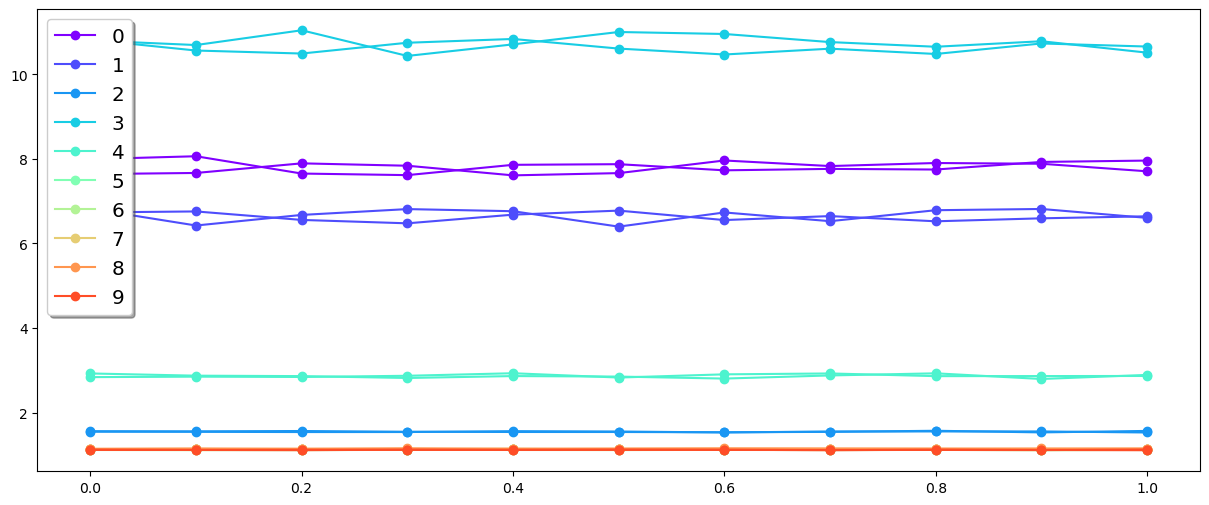

In [80]:
import matplotlib.cm as cm
fig, ax = plt.subplots(1,1, figsize=(15, 6), facecolor='w', edgecolor='k')
colors = cm.rainbow(np.linspace(0, 1, 11))
for i in range(10):
#     xx, xy = zip(*sorted(zip(i[:,0],i[:,1])))
    xx = np.linspace(0,1,11)
    xy = vt_fi[i,:,0]
    yy = vt_fi[i,:,1]
    max_y = np.max(vt_fi[i])
    min_y = np.min(vt_fi[i])

    ax.plot(xx, xy, marker='o', color = colors[i], label=range(10)[i])
    ax.plot(xx, yy, marker='o', color = colors[i])

#     ax[0].plot(xx, xy, marker='o', color = colors[i], label=range(10)[i])
#     plt.plot(yx, yy, marker='.')
#     ax.axhline(y=max_y, color=colors[i], linestyle='--')
#     ax.axhline(y=min_y, color=colors[i], linestyle='--')
legend = ax.legend(loc='upper left', shadow=True, fontsize='x-large')

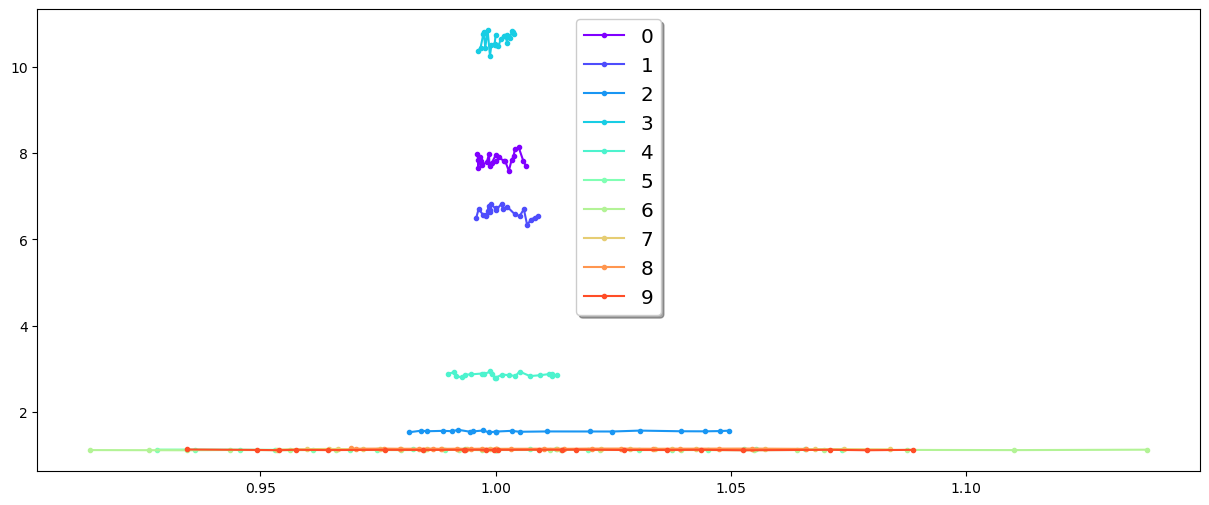

In [91]:
import matplotlib.cm as cm
fig, ax = plt.subplots(1,1, figsize=(15, 6), facecolor='w', edgecolor='k')
for i in range(10):
#     xx, xy = zip(*sorted(zip(i[:,0],i[:,1])))
#     xx, xy = zip(*sorted(zip(vt_fi[i,:,0],vt_fi[i,:,1])))

    xx = vt_f[i,:,0]
    xy = vt_fi[i,:,0]
    yx = vt_f[i,:,1]
    yy = vt_fi[i,:,1]
    max_y = np.max(vt_fi[i])
    min_y = np.min(vt_fi[i])
    ax.plot(xx, xy, marker='.', color = colors[i], label=range(10)[i])
    ax.plot(yx, yy, marker='.', color = colors[i])
#     ax.axhline(y=max_y, color=colors[i], linestyle='--')
#     ax.axhline(y=min_y, color=colors[i], linestyle='--')
#     ax[0].plot(xx, xy, marker='o', color = colors[i])
#     plt.plot(yx, yy, marker='.')
legend = ax.legend(loc='upper center', shadow=True, fontsize='x-large')

In [ ]:
vt_regression

In [ ]:
myloss_all, diff_all = Interaction_effect_all_pairs(X_f_minmax, y_f, range(10), 2, lr_f, vt_f, loss0, bound_f)

In [101]:
for j in range(45):
    for i in range(1,10):
        print(feature_interaction_strength_plot(diff_all, 2, bound_f, i, j))

[1.33538696e-06]
[1.44130572e-05]
[9.52271949e-07]
[8.36871945e-06]
[3.26004696e-06]
[1.35342296e-05]
[1.91798582e-05]
[2.58621164e-05]
[2.68670455e-05]
[8.6732478e-07]
[1.44028931e-05]
[1.34227795e-06]
[8.22841101e-07]
[3.26833038e-06]
[7.73377971e-06]
[1.93116012e-05]
[2.80169575e-05]
[2.7665553e-05]
[6.21766878e-06]
[1.41132997e-05]
[1.1678622e-06]
[6.36538256e-06]
[6.56371981e-06]
[8.68485729e-06]
[2.03137642e-05]
[2.73335459e-05]
[2.7406986e-05]
[6.76655605e-07]
[1.5000541e-05]
[2.12821379e-05]
[1.22150499e-05]
[3.85032079e-06]
[7.28323217e-06]
[1.93785904e-05]
[2.73262659e-05]
[2.56853343e-05]
[7.79967045e-07]
[1.47649082e-05]
[2.01750755e-06]
[9.62675149e-07]
[3.14647992e-06]
[7.438838e-06]
[1.8483383e-05]
[2.618856e-05]
[2.6059463e-05]
[1.62754048e-06]
[1.46568645e-05]
[7.39382833e-07]
[2.55339336e-06]
[4.55828017e-06]
[8.31741257e-06]
[1.88981336e-05]
[2.60663439e-05]
[2.55938404e-05]
[8.96510371e-07]
[1.55726646e-05]
[2.01712673e-06]
[1.29770138e-06]
[2.26157689e-06]
[7.07686

In [28]:
sum_to_one_pairs = find_all_sum_to_one_pairs(2)
sum_to_one_pairs

[(5, 5), (3, 7), (4, 6), (6, 4), (7, 3), (8, 2), (9, 1), (1, 9), (2, 8)]

In [107]:
xxx = np.array(sum_to_one_pairs)[:,0]
yyy = np.array(sum_to_one_pairs)[:,1]
value = [feature_interaction_strength_plot(diff_all, 2, bound_f, i, 0) for i in xxx]
value

[array([3.26004696e-06]),
 array([9.52271949e-07]),
 array([8.36871945e-06]),
 array([1.35342296e-05]),
 array([1.91798582e-05]),
 array([2.58621164e-05]),
 array([2.68670455e-05]),
 array([1.33538696e-06]),
 array([1.44130572e-05])]

/home/sichao/anaconda3/envs/work_env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


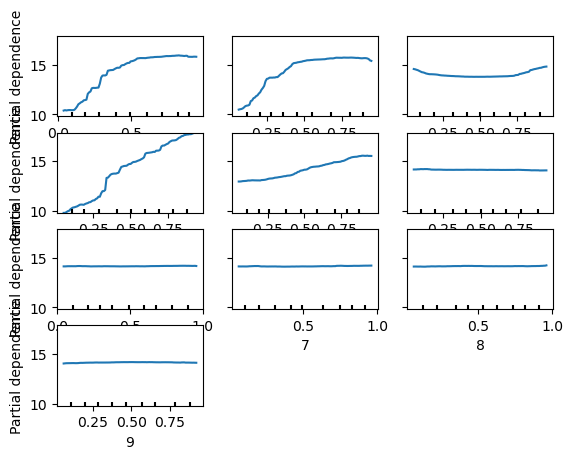

In [14]:
from sklearn.inspection import plot_partial_dependence
plot_partial_dependence(lr_f, X_f, range(10))

/home/sichao/anaconda3/envs/work_env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


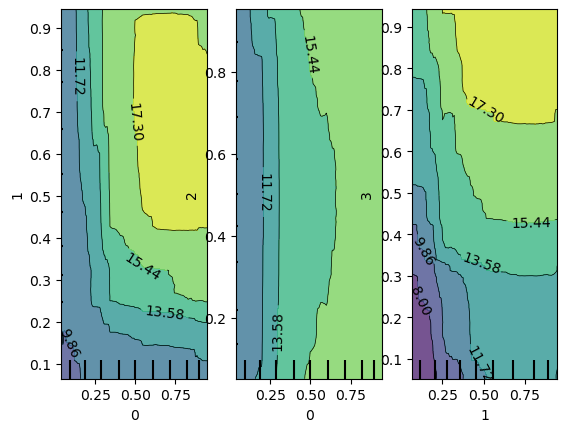

In [15]:

plot_partial_dependence(lr_f, X_f, [(0, 1), (0, 2), (1, 3)])

In [16]:
univariate = {}
for i in range(10):
    univariate[i] = partial_dependence(lr_f, X_f, features=[i], kind='average')['average']
    
bivariate = {}
for i, j in itertools.combinations(range(10),2):
    bivariate[(i, j)] = partial_dependence(lr_f, X_f, features=[i, j], kind='average')['average']

In [17]:
h = np.zeros((10, 10))
for i, j in itertools.combinations(range(len(range(10))), 2):
    h[i, j] = np.sum(np.square(bivariate[(i, j)] - univariate[i].reshape(1, -1, 1) - univariate[j].reshape(1, 1, -1) + np.mean(y_f) )) / np.sum(np.square(bivariate[(i, j)] - np.mean(y_f)))
#     h[i, j] = np.sum(np.square(bivariate[(i, j)] - univariate[i].reshape(1, -1, 1) - univariate[j].reshape(1, 1, -1))) / np.sum(np.square(bivariate[(i, j)]))

h

array([[0.        , 0.0612296 , 0.002288  , 0.01719935, 0.00422302,
        0.00054599, 0.00026272, 0.00053743, 0.00049605, 0.00029768],
       [0.        , 0.        , 0.00107157, 0.01127944, 0.00481399,
        0.00033756, 0.00034774, 0.00045092, 0.00111563, 0.00018312],
       [0.        , 0.        , 0.        , 0.00129459, 0.00601077,
        0.00229446, 0.00189083, 0.00184297, 0.00245466, 0.00134314],
       [0.        , 0.        , 0.        , 0.        , 0.00303436,
        0.00014455, 0.00053554, 0.00029662, 0.00012876, 0.00029335],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00058604, 0.00038693, 0.00053207, 0.0008616 , 0.00043538],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.08274541, 0.06619869, 0.07043515, 0.06271644],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.11583503, 0.11923931, 0.0546328 ],
       [0.        , 0.        , 0.       

In [69]:
fin = feature_interaction_strength(diff_all, 2, bound_f)
order = fin.argsort()[::-1]
ranks = [fin[i] for i in order]
# ranks = order.argsort()
ranks

[3.6185102470403727e-06,
 3.1108181214180916e-06,
 3.023804925358947e-06,
 2.581590114110689e-06,
 2.5317474933592225e-06,
 2.458513159281536e-06,
 2.4528379882881866e-06,
 2.4388705456721065e-06,
 2.434559698010878e-06,
 2.3559917786204656e-06,
 2.3231775813635134e-06,
 2.059438537182215e-06,
 2.0564243422288284e-06,
 2.0215157849337138e-06,
 1.9831820629455326e-06,
 1.9036922344387208e-06,
 1.8885748898766601e-06,
 1.8754470114964202e-06,
 1.8565238143708367e-06,
 1.7729901450062045e-06,
 1.6624409169027357e-06,
 1.6519490855231435e-06,
 1.6363219196679671e-06,
 1.6109450043072507e-06,
 1.4381642267460966e-06,
 1.3777082537462444e-06,
 1.34034946651994e-06,
 1.2962502919245947e-06,
 1.2570658728213654e-06,
 1.1903916572929762e-06,
 8.484314267140349e-07,
 7.952477315615581e-07,
 7.662684697524258e-07,
 7.170101051081305e-07,
 6.879290833075813e-07,
 6.586216767688052e-07,
 6.565406470493882e-07,
 6.552799016615596e-07,
 6.537105009802691e-07,
 5.416605728132582e-07,
 5.40405237536131

In [82]:
all_n_way_feature_pairs = find_all_n_way_feature_pairs(range(10), 2)
all_n_way_feature_pairs_to_s = [str(s) for s in all_n_way_feature_pairs]

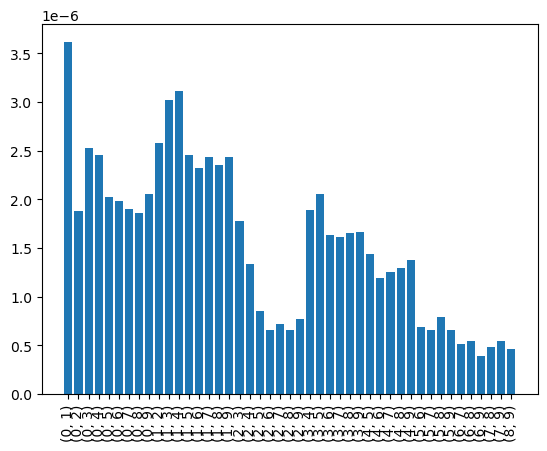

In [89]:
plt.bar(all_n_way_feature_pairs_to_s, fin)
# plt.xticks(range(len(model.feature_importances_)), train_features.columns)
plt.xticks(rotation=90)
plt.show()

In [92]:
vt_f[:2]

array([[[1.0008, 0.9992],
        [1.0018, 0.9987],
        [1.002 , 0.9986],
        [1.0028, 0.9981],
        [1.0034, 0.9972],
        [1.0038, 0.9969],
        [1.0041, 0.9966],
        [1.0049, 0.9963],
        [1.0059, 0.9963],
        [1.0065, 0.9961]],

       [[1.0013, 0.999 ],
        [1.0015, 0.9987],
        [1.0024, 0.9987],
        [1.0041, 0.9985],
        [1.0051, 0.9983],
        [1.006 , 0.998 ],
        [1.0067, 0.9979],
        [1.0075, 0.9974],
        [1.0083, 0.9964],
        [1.0089, 0.9959]]])

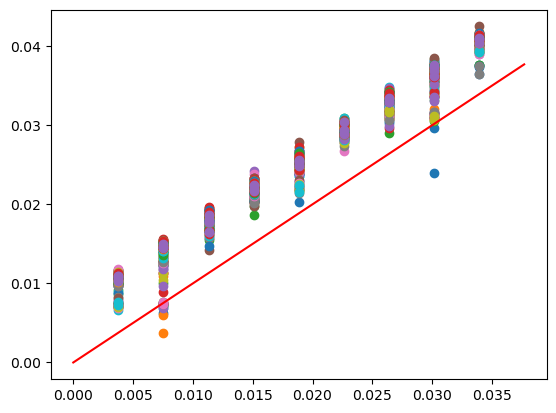

In [144]:
# plot direct linear difference

def f(x):
    return x

x = np.linspace(0, bound_f, 10)
for i in range(len(diff_all)):
    sum_to_one_pairs = find_all_sum_to_one_pairs(2)
    exp_diff = np.array(sum_to_one_pairs)[:,0]*.1*bound_f
    xxx = np.repeat(exp_diff, 4)
    ppp = np.column_stack((np.array(diff_all[i]), xxx))
    plt.scatter(ppp[:,1], ppp[:,0]+ppp[:,1])
plt.plot(x, f(x), color='red')

plt.show()

[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]


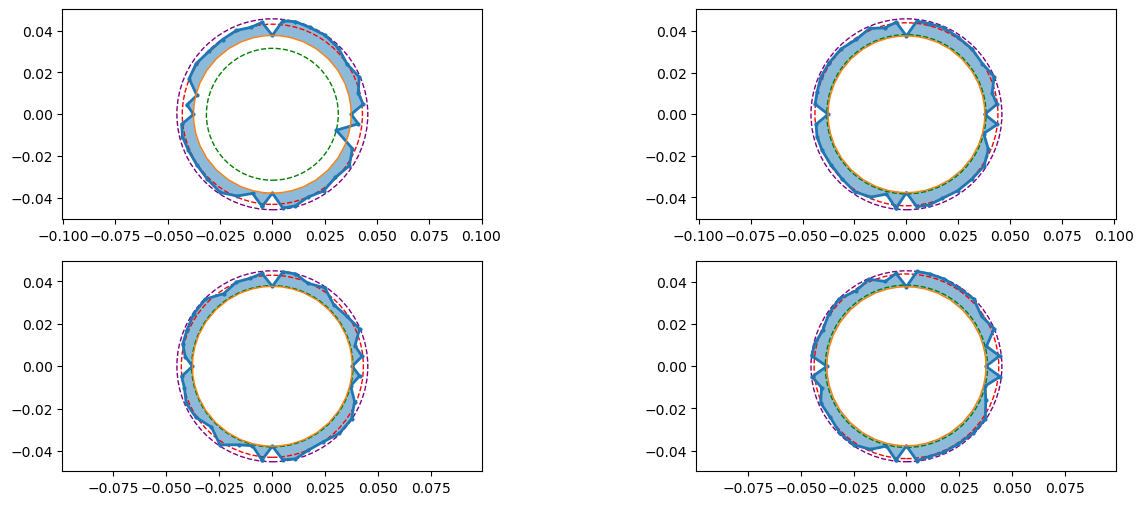

In [456]:
feature_interaction_vis(range(10), 2)